# Copyright 2021 SAME Project

In [10]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [11]:
#default_exp core

# We need the above cell because of the way that nbdev_build_lib works.

## Setup Program

In [12]:
!python3 -m pip install matplotlib pandas sklearn
!python3 -m pip install githubactioncontexthelper
!python3 -m pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### First Function

The first_function script will execute first (because it is listed as the first cell with an export)

In [13]:
# export first_function
print("="*40)
print("'first_function' python file")
print("="*40)

import os
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import requests
import githubactioncontexthelper
from githubactioncontexthelper.githubactioncontext import Context

cell_number = 1
with Context() as c:
    print("-"*40)
    print(f"Cell #1")
    print("-"*40)
    cell_number += 1

    print("Pandas version: {}".format(pd.__version__))
    print("SKLearn execution: {}".format(sklearn.__version__))


'first_function' python file
----------------------------------------
Cell #1
----------------------------------------
Pandas version: 1.2.1
SKLearn execution: 0.24.1


# Download the Data

In [14]:
# export first_function

with Context() as c:
    print("-"*40)
    print(f"Cell #2")
    print("-"*40)
    cell_number += 1

    train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
    data = requests.get(train_dataset_url).content

    with open('iris_training.csv', 'wb') as writer:
        writer.write(data)

    print("Downloaded iris_training.csv")

----------------------------------------
Cell #2
----------------------------------------
Downloaded iris_training.csv


# Load the Data Into a Data Frame

In [16]:
# export first_function

a = {}

with Context() as c:
    print("-"*40)
    print(f"Cell #3")
    print("-"*40)
    cell_number += 1

    df = pd.read_csv("iris_training.csv", names=[ 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'], skiprows=[0])

    print("Loaded iris_training.csv into a dataframe.")

    # Save the data frame back to the context
    c['df'] = df
    
    print("\n")
    print("***"*20)
    print("Hi Azure Innovations!")
    print("***"*20)
    print("\n"*2)
    
#     a = df

# a

----------------------------------------
Cell #3
----------------------------------------
Loaded iris_training.csv into a dataframe.


************************************************************
Hi Azure Innovations!
************************************************************





# Visualize the Data Frame (but Don't Export)

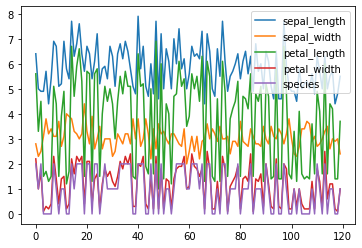

In [17]:
with Context() as c:
    df = c['df']
    df.plot()

In [18]:
# export second_function
# Need to do imports at each stage (because the files are separate)

import sys
import pandas as pd
from sklearn import preprocessing
from githubactioncontexthelper.githubactioncontext import Context

print("="*40)
print("'second_function' python file")
print("="*40)


with Context() as c:
    print("-"*40)
    print(f"Cell #1")
    print("-"*40)

    df = c['df']

    # Example code in the next step - 
    # Normalize all the values in each column
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)

    c['df'] = df
    
    print("\n")
    print("***"*20)
    print("Hello again!")
    print("***"*20)
    print("\n"*2)


'second_function' python file
----------------------------------------
Cell #1
----------------------------------------
************************************************************
Hello again!
************************************************************





# Visualize Again After Normalization (but Don't Export)

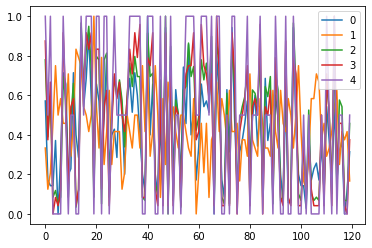

In [9]:
with Context() as c:
    df = c['df']
    
    df.plot()